Fake news detection using NLP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train_news.csv')
data.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [3]:
data.shape

(20800, 6)

In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

In [5]:
data.drop(columns = ['Unnamed: 0', 'id', 'headline', 'written_by'], inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    20761 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB


In [7]:
data.isnull().sum()

news     39
label     0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.duplicated().sum()

375

In [10]:
data.drop_duplicates(inplace=True)

## Text Preprocessing

In [11]:
# convert text into lower alphabet

data['cleaned_text'] = data['news'].str.lower()

In [12]:
import nltk


# removig punctuations and urls
import re

# Urls nand links
def remove_url(text):
  cleaned = re.sub(r'https?://\S+|www\.\S+', '',text)
  return(cleaned)

# puctuations
def remove_punct(text):
  cleaned = re.sub(r'[^\w\s]', '',text)
  return(cleaned)

In [13]:
data['cleaned_text'] = data['cleaned_text'].apply(remove_url)

In [14]:
data['cleaned_text'] = data['cleaned_text'].apply(remove_punct)

In [15]:
data.sample(5)

,news,label,cleaned_text
20077,"adobochron 1 Comment \nSAN FRANCISCO, Californ...",1,adobochron 1 comment \nsan francisco californi...
9466,President Donald Trump signed three executive ...,0,president donald trump signed three executive ...
2496,CAIRO — Egypt has deployed a submersible to...,0,cairo egypt has deployed a submersible to ...
18546,A ten-person federal jury has found that Rolli...,1,a tenperson federal jury has found that rollin...
17294,Familie Erdoğan und Daesh (Fortsetzung) Voltai...,1,familie erdoğan und daesh fortsetzung voltaire...


In [16]:
# tokenization

from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

data['news_sentences'] = data['cleaned_text'].apply(sent_tokenize)
data['news_words'] = data['cleaned_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
data.head()

,news,label,cleaned_text,news_sentences,news_words
0,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,washington in sonny perdues telling georgi...,[washington in sonny perdues telling georg...,"[washington, in, sonny, perdues, telling, geor..."
1,HOUSTON — Venezuela had a plan. It was a ta...,0,houston venezuela had a plan it was a tact...,[houston venezuela had a plan it was a tac...,"[houston, venezuela, had, a, plan, it, was, a,..."
2,"Sunday on ABC’s “This Week,” while discussing ...",0,sunday on abcs this week while discussing the ...,[sunday on abcs this week while discussing the...,"[sunday, on, abcs, this, week, while, discussi..."
3,"AUGUSTA, Me. — The beleaguered Republican g...",0,augusta me the beleaguered republican gove...,[augusta me the beleaguered republican gov...,"[augusta, me, the, beleaguered, republican, go..."
4,Finian Cunningham has written extensively on...,1,finian cunningham has written extensively on...,[ finian cunningham has written extensively o...,"[finian, cunningham, has, written, extensively..."


In [18]:
# stopwords remove

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

def remove_stwd(text):
  cleaned = [word for word in text if word not in stop_words]
  return(cleaned)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
data['news_words'] = data['news_words'].apply(remove_stwd)

In [20]:
# Lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lem = WordNetLemmatizer()

def lem_word(text):
  clean_verb = [lem.lemmatize(word, pos='v') for word in text]
  return clean_verb

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
data['news_words'] = data['news_words'].apply(lem_word)

In [22]:
data['news_words'] = data['news_words'].apply(lambda x: ' '.join(x))

In [23]:
data['news_words_counts'] = data['news_words'].apply(lambda x:len(x))

In [24]:
data.sample(5)

,news,label,cleaned_text,news_sentences,news_words,news_words_counts
2148,Farage to act as go-between for Trump and near...,1,farage to act as gobetween for trump and neare...,[farage to act as gobetween for trump and near...,farage act gobetween trump nearest dominos 111...,522
17109,Conservative firebrand Ann Coulter had a tweet...,0,conservative firebrand ann coulter had a tweet...,[conservative firebrand ann coulter had a twee...,conservative firebrand ann coulter tweet link ...,1335
8927,"The UnitedHealth Group, one of the nation’s la...",0,the unitedhealth group one of the nations larg...,[the unitedhealth group one of the nations lar...,unitedhealth group one nations largest health ...,2236
18338,Email \nJust days before the presidential elec...,1,email \njust days before the presidential elec...,[email \njust days before the presidential ele...,email days presidential election numerous pund...,5014
9440,BEIJING — Secretary of State Rex W. Tillers...,0,beijing secretary of state rex w tillerson...,[beijing secretary of state rex w tillerso...,beijing secretary state rex w tillerson presid...,5111


In [25]:
data['label'].value_counts()

0    10387
1     9999
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

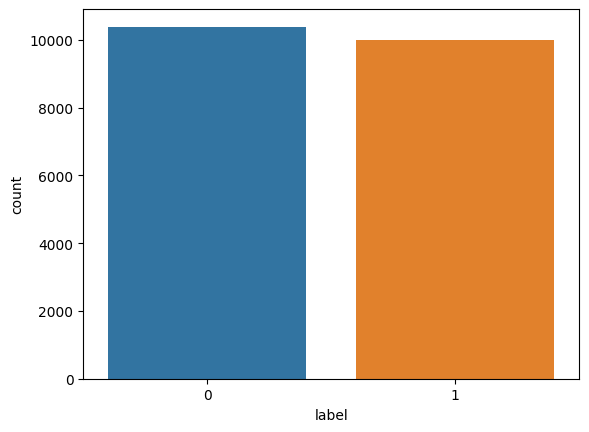

In [26]:
# the dataset is balanced


sns.countplot(data, x=data['label'])

<Axes: xlabel='label', ylabel='news_words_counts'>

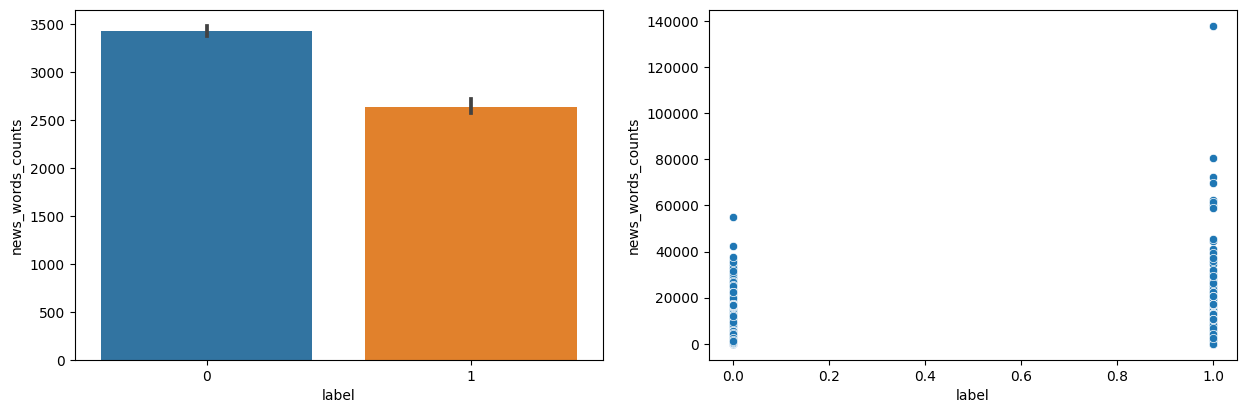

In [27]:
# avarage words in real and fake news

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=data, x=data['label'], y=data['news_words_counts'])


plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data['label'], y=data['news_words_counts'])




# fake news have slightly more words than real news


In [28]:
X = data['news_words']
y = data['label']

In [29]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=10)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(max_features = 5000)

In [31]:
Xtrain = vector.fit_transform(Xtrain)
Xtest = vector.fit_transform(Xtest)

In [32]:
Xtrain.shape

(16308, 5000)

In [33]:
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

Applying naive bayes

In [34]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Gaussian Naive Bayes

In [35]:
gnb.fit(Xtrain, ytrain)

GaussianNB()

In [36]:
ypred1 = gnb.predict(Xtest)
ypred1

array([0, 0, 1, ..., 1, 0, 1])

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [38]:
print('accuracy_score ',accuracy_score(ytest, ypred1))
print('precision_score',precision_score(ytest, ypred1, average='weighted'))
print('recall_score', recall_score(ytest, ypred1, average='weighted'))
print('f1_score', f1_score(ytest, ypred1, average='weighted'))

accuracy_score  0.443845022069642
precision_score 0.4239518393540365
recall_score 0.443845022069642
f1_score 0.383735499002369


In [39]:
confusion_matrix(ytest, ypred1)

array([[ 299, 1810],
       [ 458, 1511]])

Multinomial Naive Bayes

In [40]:
mnb.fit(Xtrain, ytrain)

MultinomialNB()

In [41]:
ypred2 = mnb.predict(Xtest)
ypred2

array([0, 0, 1, ..., 0, 0, 1])

In [42]:
print('accuracy_score ',accuracy_score(ytest, ypred2))
print('precision_score',precision_score(ytest, ypred2, average='weighted'))
print('recall_score', recall_score(ytest, ypred2, average='weighted'))
print('f1_score', f1_score(ytest, ypred2, average='weighted'))

accuracy_score  0.5223148602256008
precision_score 0.5214607841811336
recall_score 0.5223148602256008
f1_score 0.521479884273837


In [43]:
confusion_matrix(ytest, ypred2)

array([[1192,  917],
       [1031,  938]])

Bernoulli Naive Bayes

In [44]:
bnb.fit(Xtrain, ytrain)

BernoulliNB()

In [45]:
ypred3 = bnb.predict(Xtest)
ypred3

array([0, 1, 0, ..., 0, 0, 0])

In [46]:
print('accuracy_score ',accuracy_score(ytest, ypred3))
print('precision_score',precision_score(ytest, ypred3, average='weighted'))
print('recall_score', recall_score(ytest, ypred3, average='weighted'))
print('f1_score', f1_score(ytest, ypred3, average='weighted'))

accuracy_score  0.616233447768514
precision_score 0.6326877504668131
recall_score 0.616233447768514
f1_score 0.6089786478896617


In [47]:
confusion_matrix(ytest, ypred3)

array([[1011, 1098],
       [ 467, 1502]])